In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("NetworkTrafficAnomalyDetectionusingmachineLearning.csv")
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [4]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [5]:
set(list(df.dtypes))


{dtype('int64'), dtype('float64'), dtype('O')}

In [6]:
categorical_columns=[col for col in df.columns if df[col].dtype=="O"]
categorical_columns

[' Label']

In [7]:
## Categorical Data
df_Categorical=df[categorical_columns]
df_Categorical.astype("category").value_counts()

 Label
BENIGN    189067
Bot         1966
Name: count, dtype: int64

In [8]:
# Numerical data
df_Numerical=df.copy()
df_Numerical.drop([" Label"],axis=1,inplace=True)
## cols = df.select_dtypes(include=['float64','int64']).columns

df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


( Label
 BENIGN    189067
 Bot         1966
 Name: count, dtype: int64,
 <Axes: xlabel=' Label', ylabel='count'>)

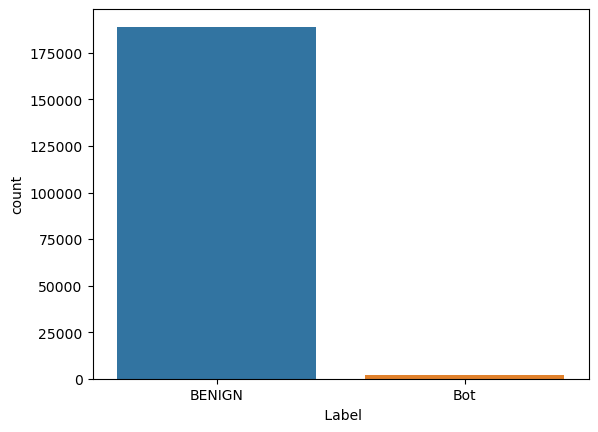

In [9]:
##  To check the Counts of each Class in the dependent Variable
df_Categorical[" Label"].value_counts(),sns.countplot(x=df_Categorical[' Label'])

In [10]:
## To check Unique values in the data
for i in df_Numerical.columns:
    #if df[i].unique()<
    print(f" {i} Column has {df[i].nunique()} unique values and those are {df[i].unique()}\n\n")

  Destination Port Column has 16089 unique values and those are [ 3268   389     0 ...  4997 33279 33280]


  Flow Duration Column has 91470 unique values and those are [112740690 112740560 113757377 ...  60921076 116036371     16842]


  Total Fwd Packets Column has 505 unique values and those are [    32    545     22      4      7      1      9     13     11     21
     20      2     25      3     48     46    460    388      6     49
    206     14     24     19     27    124    360     12     10      8
    132      5     33    270     15     39    171     16     43     64
    380    108     36     17     38     35    264    252     28     18
     96     29     82     23    156   1161    468     98     53    343
   3694   1227    120     41     68     52     30     26     37    653
     62     54     55     47    106     57    138     86     83     67
    131     79     69     45   1303     63    105    118     81     40
    134     34     31     70     72     61     74   3799    2

In [11]:
for i in df_Numerical.columns:
    if df[i].isnull().sum()>0:
        print(i)

Flow Bytes/s


In [12]:
## We are having nan values in this column
df_Numerical["Flow Bytes/s"].isnull().sum()

28

In [13]:
## To check the dependent column data , when the data is nan
#nan_rows = df[df["Flow Bytes/s"].isnull()]
for index, row in df_Numerical.iterrows():
    if pd.isna(row["Flow Bytes/s"]):
        print(row["Flow Bytes/s"],df_Categorical[" Label"].iloc[index])

nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN
nan BENIGN


In [14]:
## Drop the nan values
df_Numerical.dropna(inplace=True)

In [15]:
## To check this funtion all columns should be numerical data types like int,float  should not include "Object datatype"
np.all(np.isfinite(df_Numerical.values))

False

In [16]:
## To check total sum of the infinite values in the data
np.isinf(df_Numerical).values.sum()
## To check all values of dataframe are finite
#np.all(np.isfinite(df.values))
#np.all(np.isinf(df))


188

In [17]:
#infintie_column_list=[]
#count={}
#list1=df_Numerical.columns
#for index,row in df_Numerical.iterrows():
 #   for j in list1:
  #      if np.isfinite(row[j])==False:
 #           infintie_column_list.append(j)
  #          count[j]=
    #        print(f" This column '{j}' has infinity value in {index} ,this looks like {row[j]}\n")#

In [18]:
#infinite_column_list = []

# Iterate through the rows of the DataFrame
#for index, row in df_Numerical.iterrows():
 #   for column in df_Numerical.columns:
#        if not np.isfinite(row[column]):
            # Add the column name to the list of columns with infinite values
  #          infinite_column_list.append(column)
            #print(f"Row {index}: Column '{column}' has infinite value: {row[column]}")

# Remove duplicates from the list of columns with infinite values
#infinite_column_list = list(set(infinite_column_list))

# Print the list of columns with infinite values
#print("\nColumns with infinite values:")
#print(infinite_column_list)

In [19]:
import numpy as np

infinite_column_count = {}  # Dictionary to store counts
infinite_Value_index_num = []  # List to store index numbers

# Iterate through the columns
for column in df_Numerical.columns:
    count = 0  # Initialize count for the current column
    for index, value in enumerate(df_Numerical[column]):
        if not np.isfinite(value):
            count += 1  # Increment count for non-numeric (infinite) values
            infinite_Value_index_num.append(index)  # Append the index number
    if count > 0:
        infinite_column_count[column] = count  # Store count in the dictionary

# Convert the list of index numbers to a set to remove duplicates
infinite_Value_index_num = set(infinite_Value_index_num)

# Print the dictionary and the set of index numbers
print("Counts of non-numeric (infinite) values in each column:")
print(f"{infinite_column_count}\n")

print("Index numbers of non-numeric (infinite) values:")
print(infinite_Value_index_num)

Counts of non-numeric (infinite) values in each column:
{'Flow Bytes/s': 94, ' Flow Packets/s': 94}

Index numbers of non-numeric (infinite) values:
{11778, 188931, 163844, 57872, 134161, 99347, 121373, 51746, 135208, 105006, 134190, 168500, 106551, 4153, 64057, 117825, 143945, 604, 106596, 87655, 48239, 38005, 13950, 61066, 170122, 75916, 76428, 106638, 4752, 25233, 186009, 28314, 81055, 118442, 29367, 90305, 85699, 3786, 118987, 70348, 190155, 75983, 14039, 12503, 39129, 172761, 37606, 41704, 23785, 42730, 112367, 116984, 83704, 127745, 145671, 61710, 24344, 13093, 107301, 79148, 41265, 40756, 68916, 110916, 33623, 36700, 100188, 14183, 9581, 63853, 114031, 4466, 131978, 30603, 31115, 161688, 154012, 37281, 47522, 126379, 34223, 113071, 124338, 33718, 177098, 45515, 132555, 173003, 16846, 17874, 40405, 33773, 34802, 125944}


In [20]:
Benign=0
bot=0
for i in infinite_Value_index_num:
    if df_Categorical[" Label"].iloc[i]=="BENIGN":
        Benign+=1
    else:
        bot+=1

print(f" Benign counts are {Benign}\n\n")
print(f" bot counts are {bot}")


 Benign counts are 94


 bot counts are 0


In [22]:
## Replace the infinite values with nan values and then delete each row
df_Numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Numerical.dropna(inplace=True)

In [23]:
## To confirm once again is there any nan or infinite values
## To check total sum of the infinite values in the data
#np.isinf(df_Numerical).values.sum(),np.any(np.isnan(df_Numerical))
np.all(np.isinf(df_Numerical)),np.any(np.isnan(df_Numerical))

(False, False)

In [24]:
# To check is there any nan values
#np.any(np.isnan(df)),  np.all(np.isfinite(df))
#np.isfinite(df[' Destination Port'].iloc[1])

In [25]:
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191028,53,61452,4,2,180,354,45,45,45.0,0.000000,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191029,53,171,2,2,80,272,40,40,40.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191030,53,222,2,2,90,354,45,45,45.0,0.000000,...,1,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
191031,123,16842,1,1,48,48,48,48,48.0,0.000000,...,0,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


In [26]:
df_Numerical.shape,df_Categorical.shape

((190911, 78), (191033, 1))

In [27]:
# Create a list of index numbers from df_Numerical
index_numbers_to_fetch = df_Numerical.index.tolist()

# Fetch the corresponding rows from df_Categorical
df_Categorical = df_Categorical.loc[index_numbers_to_fetch]

# df_Categorical_subset now contains the rows from df_Categorical that correspond to the index numbers in df_Numerical

In [28]:
df_Categorical

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
191028,BENIGN
191029,BENIGN
191030,BENIGN
191031,BENIGN


In [29]:
y=df_Categorical
X=df_Numerical
y

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
191028,BENIGN
191029,BENIGN
191030,BENIGN
191031,BENIGN


In [30]:
#bot data is less so we are using Oversampling Using SMOTE
!pip install imbalanced-learn


In [31]:
from imblearn.over_sampling import RandomOverSampler

   # Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_sm, y_sm = ros.fit_resample(X, y)

  #  # Initialize SMOTE with a smaller k_neighbors value
  #  sm = SMOTE(random_state=42, k_neighbors=min_samples)
  #  X_sm,y_sm=sm.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_sm, columns=X.columns), pd.DataFrame(y_sm, columns=y.columns)], axis=1)
df_resampled.to_csv('resampled_data.csv', index=False)

( Label
 BENIGN    188955
 Bot       188955
 Name: count, dtype: int64,
 <Axes: xlabel=' Label', ylabel='count'>)

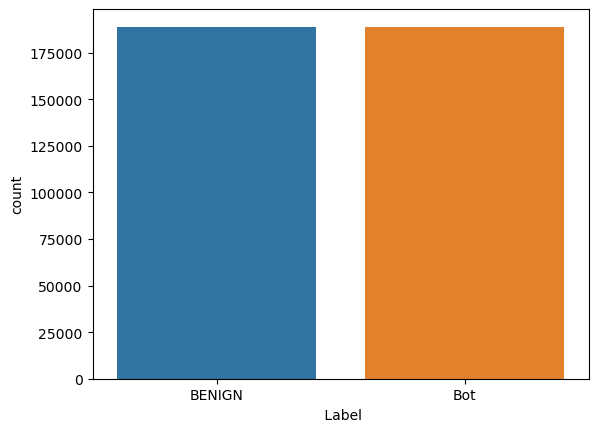

In [32]:
df_resampled[" Label"].value_counts(),sns.countplot(x=df_resampled[' Label'])

In [33]:
df_resampled.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [34]:
df_Numerical=df_resampled.copy()
df_Numerical.drop([" Label"],axis=1,inplace=True)
## X= df_Numerical


In [35]:
df_Categorical=df_resampled[categorical_columns]
df_Categorical.astype("category").value_counts()

 Label
BENIGN    188955
Bot       188955
Name: count, dtype: int64

In [36]:
## Dependent data
y=pd.get_dummies(data=df_resampled[" Label"], drop_first=True)
y


,Bot
0,False
1,False
2,False
3,False
4,False
...,...
377905,True
377906,True
377907,True
377908,True


In [37]:
# Independent data
df_Numerical


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3268,112740690,32,16,6448,1152,403,0,201.50,204.724205,...,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000
1,389,112740560,32,16,6448,5056,403,0,201.50,204.724205,...,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000
2,0,113757377,545,0,0,0,0,0,0.00,0.000000,...,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997
3,5355,100126,22,0,616,0,28,28,28.00,0.000000,...,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
4,0,54760,4,0,0,0,0,0,0.00,0.000000,...,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377905,8080,71178,4,3,207,134,195,0,51.75,95.541876,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
377906,8080,93603,4,3,207,134,195,0,51.75,95.541876,...,3,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
377907,8080,996582,3,3,0,18,0,0,0.00,0.000000,...,0,28,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0
377908,8080,1045232,3,3,0,18,0,0,0.00,0.000000,...,0,28,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0


In [38]:
df_Numerical_Scaled_data=pd.DataFrame()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Numerical_Scaled_data[df_Numerical.columns] = scaler.fit_transform(df_Numerical[df_Numerical.columns])

In [39]:
df_Numerical_Scaled_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.050317,0.939506,0.000149,0.000056,0.005220,1.837321e-06,0.016237,0.000000,0.033918,0.029041,...,0.000076,0.571429,0.000003,2.380559e-07,0.000004,3.235849e-06,0.134167,0.006512,0.136667,0.128333
1,0.005989,0.939505,0.000149,0.000056,0.005220,8.063796e-06,0.016237,0.000000,0.033918,0.029041,...,0.000076,0.571429,0.000003,3.124006e-07,0.000003,2.688679e-06,0.134167,0.006512,0.136667,0.128333
2,0.000000,0.947978,0.002616,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.088319,1.453303e-01,0.178302,1.792453e-07,0.101667,0.090546,0.173333,0.045875
3,0.082451,0.000834,0.000101,0.000000,0.000499,0.000000e+00,0.001128,0.012043,0.004713,0.000000,...,0.000106,0.571429,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000456,0.000014,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377905,0.124407,0.000593,0.000014,0.000011,0.000168,2.137161e-07,0.007857,0.000000,0.008711,0.013553,...,0.000015,0.357143,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
377906,0.124407,0.000780,0.000014,0.000011,0.000168,2.137161e-07,0.007857,0.000000,0.008711,0.013553,...,0.000015,0.357143,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
377907,0.124407,0.008305,0.000010,0.000011,0.000000,2.870813e-08,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
377908,0.124407,0.008710,0.000010,0.000011,0.000000,2.870813e-08,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


In [40]:
## Dependent data
X=df_Numerical_Scaled_data

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
## The size of Train and test data
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((253199, 78), (253199, 1), (124711, 78), (124711, 1))

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
## Train the model with training data
logistic_model.fit(X_train, y_train)

C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
## Get prediction for testing data(X_Test)
y_pred = logistic_model.predict(X_test)

In [45]:
from sklearn.metrics import *
## Compare both y_pred and y_test
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 96.78616962417108
Confusion Matrix
[[58940  3355]
 [  653 61763]]


In [46]:
# from sklearn.svm import SVC
# from sklearn.naive_bayes import BernoulliNB
# from sklearn import tree
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import *
# from sklearn.tree import *
#  ## Cross Validation score by using K-fold Cross validation
# #scores = cross_val_score(v, X_train, y_train, cv=10)
# #classification = metrics.classification_report(y_train, v.predict(X_train))

In [47]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:18
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:18
   ---------------------------------------- 0.1/124.9 MB 610.6 kB/s eta 0:03:25
   ---------------------------------------- 0.1/124.9 MB 610.6 kB/s eta 0:03:25
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:59
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:59
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:58
   ---------------------------------------- 0.6/124.9 MB 1.3 MB/s eta 0:01:34
   ---------------------------------------- 0.7/124.9 MB 1.4 MB/s eta 0:01:28
   ---------------------------------------- 1.0/124.9 MB 1.9 MB/s eta 0:01:04

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Function to split data into training and testing sets
# Function to split data
def split_data(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a classification model
def train_model(model, X_train, y_train):
    y_train = y_train.values.ravel()
    model.fit(X_train, y_train)

# Function to evaluate a classification model
def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    confusion_matrix_result = confusion_matrix(y, y_pred)
    classification = classification_report(y, y_pred)


    print(f'============================== {dataset_name} Model Evaluation ==============================')
    print()
    print("Model Accuracy:\n", accuracy)
    print()
    print("Confusion matrix:\n", confusion_matrix_result)
    print()
    print("Classification report:\n", classification)
    print()

# Function for hyperparameter tuning
def tune_hyperparameters(model, param_grid, X_train, y_train, search_type='grid', cv=5):
    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    else:
        search = RandomizedSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring='accuracy', n_iter=10, random_state=42)
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# Define models
models = [
    ('Naive Bayes Classifier', BernoulliNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    #('KNeighbors Classifier', KNeighborsClassifier(n_jobs=-1)),
    ('Logistic Regression', LogisticRegression(n_jobs=-1, random_state=0)),
    ('Random Forest Classifier', RandomForestClassifier(n_jobs=-1, random_state=0)),
    ('XGBoost Classifier', XGBClassifier(eval_metric='mlogloss'))
]

# Define parameter grids for each model
param_grids = {
    'Naive Bayes Classifier': {
        'alpha': [0.1, 0.5, 1.0]
    },
    'Decision Tree Classifier': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    # 'KNeighbors Classifier': {
    #     'n_neighbors': [3, 5, 7],
    #     'weights': ['uniform', 'distance'],
    #     'metric': ['euclidean', 'manhattan']
    # },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest Classifier': {
        'n_estimators': [100, 200, 500],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost Classifier': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0]
    }
}

# Example usage (assuming X and y are your features and target variables)
X_train, X_test, y_train, y_test = split_data(X, y)

# Iterate through models and perform hyperparameter tuning
for model_name, model in models:
    print(f"Hyperparameter tuning for {model_name}...")

    # Get the parameter grid for the model
    param_grid = param_grids.get(model_name, {})

    # Perform hyperparameter tuning
    best_model, best_params = tune_hyperparameters(model, param_grid, X_train, y_train)

    if best_model is not None and best_params is not None:
        print(f"Best parameters for {model_name}: {best_params}")
    else:
        print(f"Hyperparameter tuning failed for {model_name}.")
        continue

    # Train and evaluate the tuned model
    print(f"Evaluating {model_name}...")
    train_model(model, X_train, y_train)
    evaluate_model(model, X_train, y_train, f'Training - {model_name}')
    evaluate_model(model, X_test, y_test, f'Test - {model_name}')

Hyperparameter tuning for Naive Bayes Classifier...


C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters for Naive Bayes Classifier: {'alpha': 0.1}
Evaluating Naive Bayes Classifier...
============================== Training - Naive Bayes Classifier Model Evaluation ==============================

Model Accuracy:
 0.9317760842528644

Confusion matrix:
 [[130960  20326]
 [   300 150742]]

Classification report:
               precision    recall  f1-score   support

       False       1.00      0.87      0.93    151286
        True       0.88      1.00      0.94    151042

    accuracy                           0.93    302328
   macro avg       0.94      0.93      0.93    302328
weighted avg       0.94      0.93      0.93    302328


============================== Test - Naive Bayes Classifier Model Evaluation ==============================

Model Accuracy:
 0.9309888597814294

Confusion matrix:
 [[32534  5135]
 [   81 37832]]

Classification report:
               precision    recall  f1-score   support

       False       1.00      0.86      0.93     37669
        True   

C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Evaluating Logistic Regression...
============================== Training - Logistic Regression Model Evaluation ==============================

Model Accuracy:
 0.9689542483660131

Confusion matrix:
 [[143434   7852]
 [  1534 149508]]

Classification report:
               precision    recall  f1-score   support

       False       0.99      0.95      0.97    151286
        True       0.95      0.99      0.97    151042

    accuracy                           0.97    302328
   macro avg       0.97      0.97      0.97    302328
weighted avg       0.97      0.97      0.97    302328


============================== Test - Logistic Regression Model Evaluation ==============================

Model Accuracy:
 0.9684977904792146

Confusion matrix:
 [[35678  1991]
 [  390 37523]]

Classification report:
               precision    recall  f1-score   support

       False       0.99      0.95      0.97     37669
        T

C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters for Random Forest Classifier: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Evaluating Random Forest Classifier...
============================== Training - Random Forest Classifier Model Evaluation ==============================

Model Accuracy:
 0.996272260591146

Confusion matrix:
 [[150159   1127]
 [     0 151042]]

Classification report:
               precision    recall  f1-score   support

       False       1.00      0.99      1.00    151286
        True       0.99      1.00      1.00    151042

    accuracy                           1.00    302328
   macro avg       1.00      1.00      1.00    302328
weighted avg       1.00      1.00      1.00    302328


============================== Test - Random Forest Classifier Model Evaluation ==============================

Model Accuracy:
 0.996361567568998

Confusion matrix:
 [[37394   275]
 [    0 37913]]

Classification report:
               precision    recall  f1-score   support

       False   

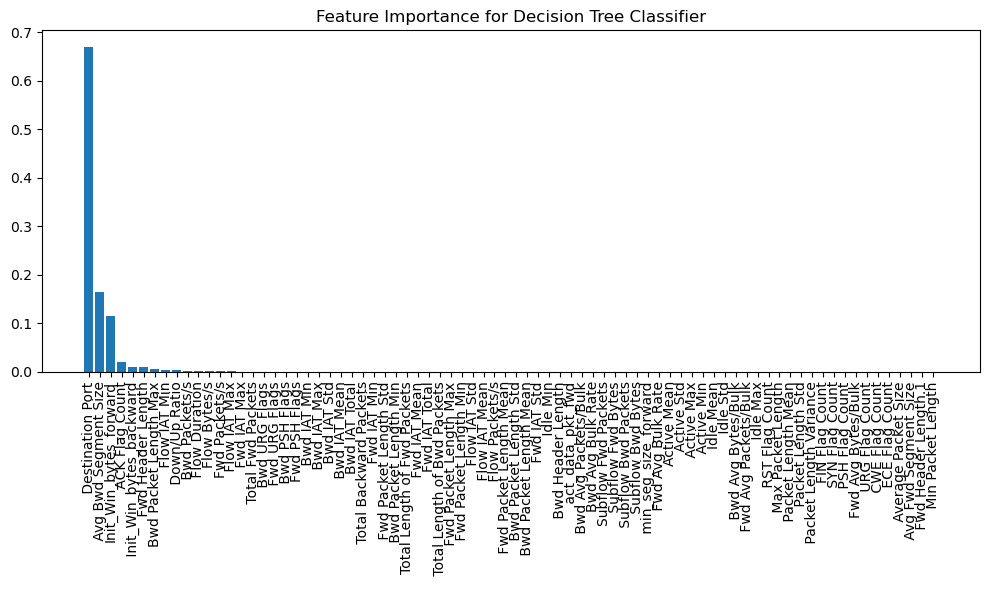

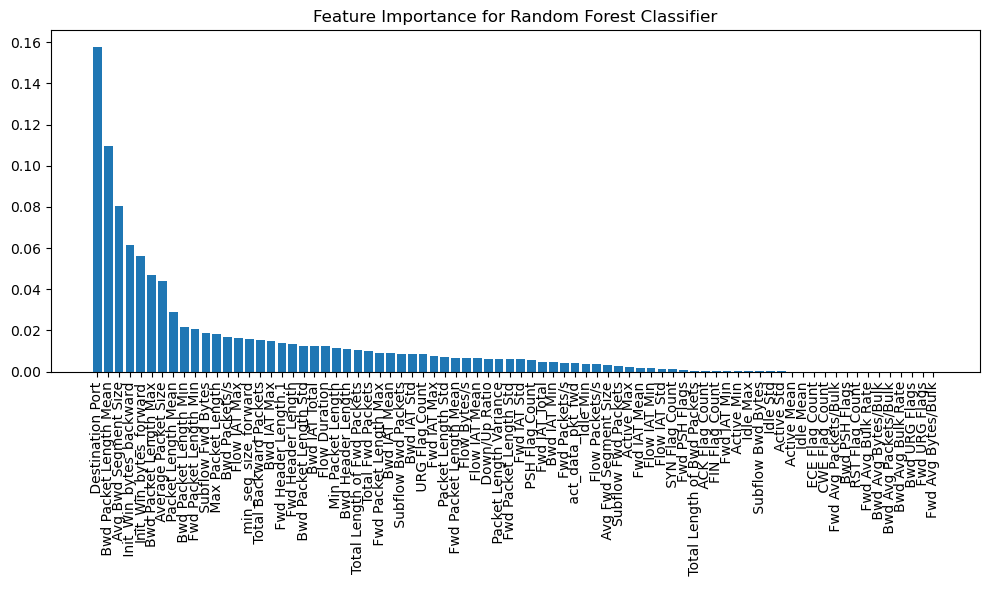

In [49]:
# prompt: # Visualize feature importance for tree-based models
# for model_name, model in models:
#     if 'Decision Tree' in model_name or 'Random Forest' in model_name:
#         importances = model.feature_importances_
#         feature_names = X.columns
#         indices = np.argsort(importances)[::-1]
#         plt.figure(figsize=(10, 6))
#         plt.title(f'Feature Importance for {model_name}')
#         plt.bar(r

import matplotlib.pyplot as plt
import numpy as np
# Visualize feature importance for tree-based models
for model_name, model in models:
    if 'Decision Tree' in model_name or 'Random Forest' in model_name:
        importances = model.feature_importances_
        feature_names = X.columns
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance for {model_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
# Function to split data into training and testing sets
def split_data(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a classification model
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

# Function to evaluate a classification model
# def evaluate_model(model, X, y):
#     y_pred = model.predict(X)

#     accuracy = accuracy_score(y, y_pred)
#     confusion_matrix_result = confusion_matrix(y, y_pred)
#     classification = classification_report(y, y_pred)
#     f1 = f1_score(y, y_pred)
#     precision = precision_score(y, y_pred)
#     recall = recall_score(y, y_pred)

#     return {
#         'accuracy': accuracy,
#         'confusion_matrix': confusion_matrix_result,
#         'classification_report': classification,
#         'f1_score': f1,
#         'precision': precision,
#         'recall': recall
#     }
def evaluate_model(model, X, y, description):
    # Generate predictions
    predictions = model.predict(X)
    
    # Calculate metrics
    accuracy = accuracy_score(y, predictions)
    confusion_matrix_result = confusion_matrix(y, predictions)
    f1 = f1_score(y, predictions, average='weighted')
    precision = precision_score(y, predictions, average='weighted')
    recall = recall_score(y, predictions, average='weighted')
    
    # Generate classification report
    class_report = classification_report(y, predictions)
    
    # Print the metrics and classification report
    print(f'{description} Accuracy: {accuracy}')
    print(f'{description} Confusion Matrix:\n {confusion_matrix_result}')
    print(f'{description} F1 Score: {f1}')
    print(f'{description} Precision: {precision}')
    print(f'{description} Recall: {recall}')
    print(f'{description} Classification Report:\n {class_report}')
    
    return {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix_result,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'classification_report': class_report
    }


In [70]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(precision, recall, auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(auc))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for {}'.format(model_name))
    plt.legend(loc='lower left')
    plt.show()

Training - Naive Baye Classifier Accuracy: 0.9317760842528644
Training - Naive Baye Classifier Confusion Matrix:
 [[130960  20326]
 [   300 150742]]
Training - Naive Baye Classifier F1 Score: 0.9314791176024175
Training - Naive Baye Classifier Precision: 0.9394951311214887
Training - Naive Baye Classifier Recall: 0.9317760842528644
Training - Naive Baye Classifier Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.87      0.93    151286
        True       0.88      1.00      0.94    151042

    accuracy                           0.93    302328
   macro avg       0.94      0.93      0.93    302328
weighted avg       0.94      0.93      0.93    302328

Test - Naive Baye Classifier Accuracy: 0.9309888597814294
Test - Naive Baye Classifier Confusion Matrix:
 [[32534  5135]
 [   81 37832]]
Test - Naive Baye Classifier F1 Score: 0.93066379585126
Test - Naive Baye Classifier Precision: 0.9388141813847171
Test - Naive Baye Classifier R

C:\Users\pandi\AppData\Local\Temp\ipykernel_26368\824116804.py:81: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


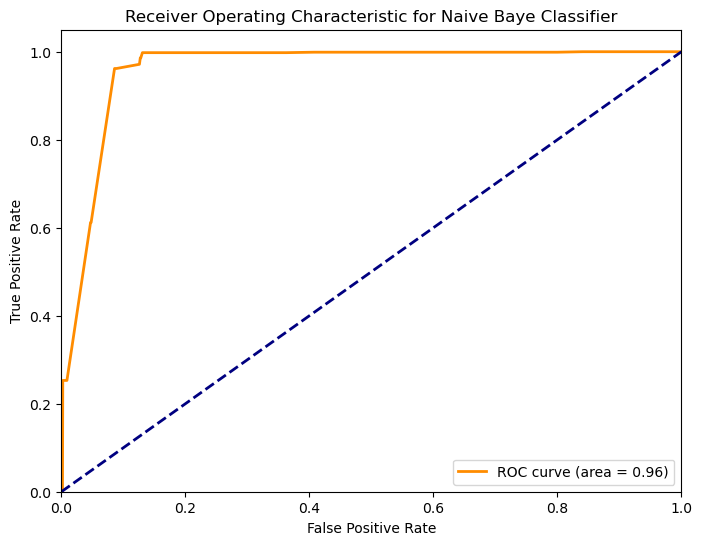

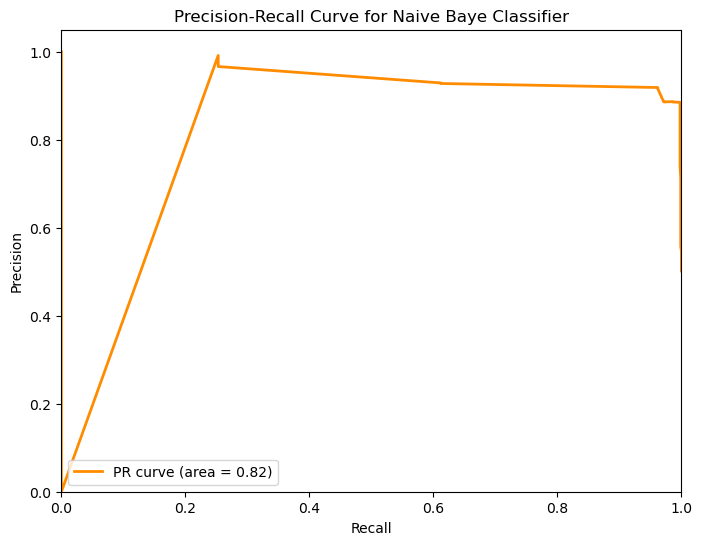

Training - Decision Tree Classifier Accuracy: 1.0
Training - Decision Tree Classifier Confusion Matrix:
 [[151286      0]
 [     0 151042]]
Training - Decision Tree Classifier F1 Score: 1.0
Training - Decision Tree Classifier Precision: 1.0
Training - Decision Tree Classifier Recall: 1.0
Training - Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    151286
        True       1.00      1.00      1.00    151042

    accuracy                           1.00    302328
   macro avg       1.00      1.00      1.00    302328
weighted avg       1.00      1.00      1.00    302328

Test - Decision Tree Classifier Accuracy: 0.9999470773464582
Test - Decision Tree Classifier Confusion Matrix:
 [[37665     4]
 [    0 37913]]
Test - Decision Tree Classifier F1 Score: 0.9999470773372681
Test - Decision Tree Classifier Precision: 0.9999470829294582
Test - Decision Tree Classifier Recall: 0.9999470773464582

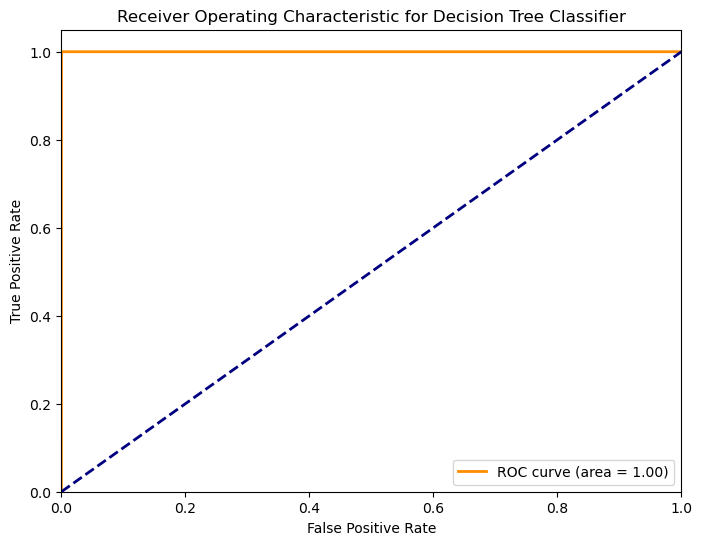

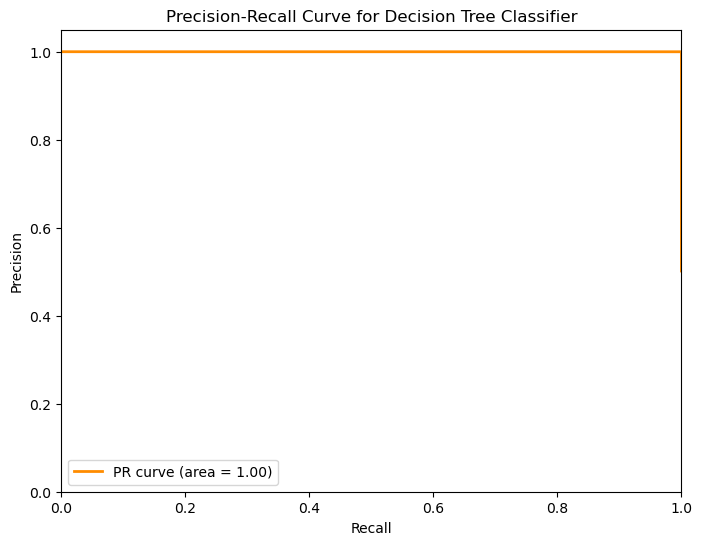

Training - LogisticRegression Accuracy: 0.9689542483660131
Training - LogisticRegression Confusion Matrix:
 [[143434   7852]
 [  1534 149508]]
Training - LogisticRegression F1 Score: 0.9689412084384382
Training - LogisticRegression Precision: 0.9697758817029093
Training - LogisticRegression Recall: 0.9689542483660131
Training - LogisticRegression Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.95      0.97    151286
        True       0.95      0.99      0.97    151042

    accuracy                           0.97    302328
   macro avg       0.97      0.97      0.97    302328
weighted avg       0.97      0.97      0.97    302328

Test - LogisticRegression Accuracy: 0.9684977904792146
Test - LogisticRegression Confusion Matrix:
 [[35678  1991]
 [  390 37523]]
Test - LogisticRegression F1 Score: 0.9684814918596997
Test - LogisticRegression Precision: 0.9693360647671684
Test - LogisticRegression Recall: 0.9684977904792146
Test 

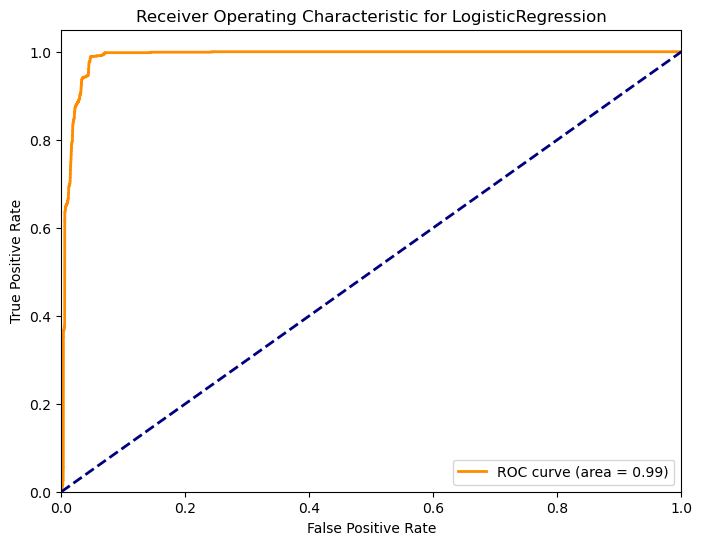

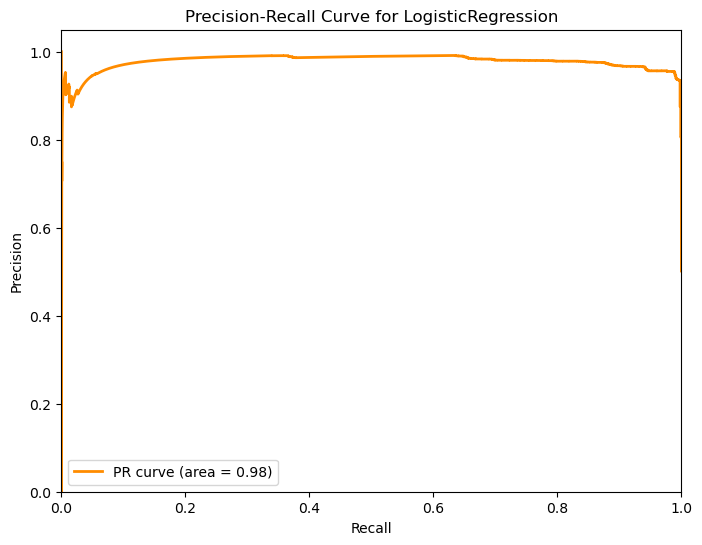

Training - XGBoost Classifier Accuracy: 0.9999933846683072
Training - XGBoost Classifier Confusion Matrix:
 [[151284      2]
 [     0 151042]]
Training - XGBoost Classifier F1 Score: 0.9999933846683423
Training - XGBoost Classifier Precision: 0.9999933847559022
Training - XGBoost Classifier Recall: 0.9999933846683072
Training - XGBoost Classifier Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    151286
        True       1.00      1.00      1.00    151042

    accuracy                           1.00    302328
   macro avg       1.00      1.00      1.00    302328
weighted avg       1.00      1.00      1.00    302328

Test - XGBoost Classifier Accuracy: 0.999973538673229
Test - XGBoost Classifier Confusion Matrix:
 [[37667     2]
 [    0 37913]]
Test - XGBoost Classifier F1 Score: 0.9999735386709503
Test - XGBoost Classifier Precision: 0.9999735400690527
Test - XGBoost Classifier Recall: 0.999973538673229
Test - 

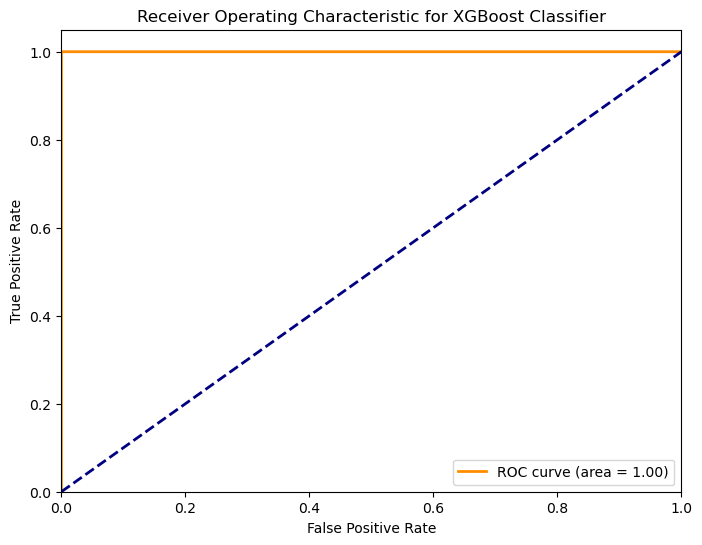

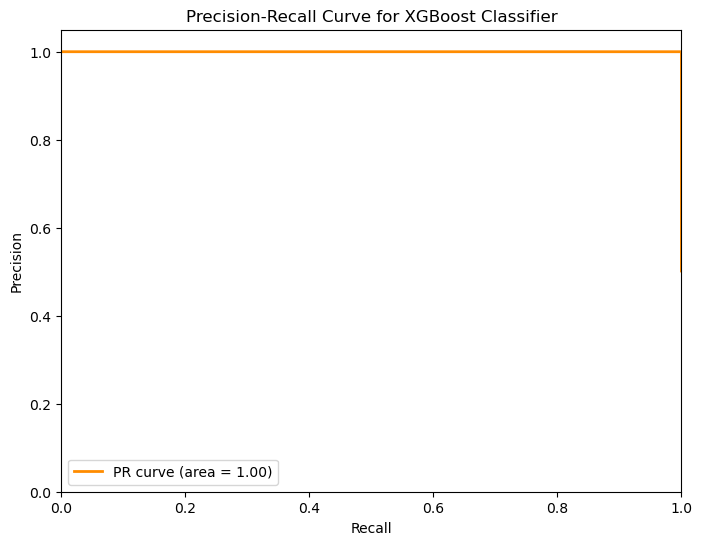

Training - Random Forest Classifier Accuracy: 0.996272260591146
Training - Random Forest Classifier Confusion Matrix:
 [[150159   1127]
 [     0 151042]]
Training - Random Forest Classifier F1 Score: 0.9962722200050643
Training - Random Forest Classifier Precision: 0.9962998691205691
Training - Random Forest Classifier Recall: 0.996272260591146
Training - Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.99      1.00    151286
        True       0.99      1.00      1.00    151042

    accuracy                           1.00    302328
   macro avg       1.00      1.00      1.00    302328
weighted avg       1.00      1.00      1.00    302328

Test - Random Forest Classifier Accuracy: 0.996361567568998
Test - Random Forest Classifier Confusion Matrix:
 [[37394   275]
 [    0 37913]]
Test - Random Forest Classifier F1 Score: 0.9963614766618393
Test - Random Forest Classifier Precision: 0.996387768703347
Te

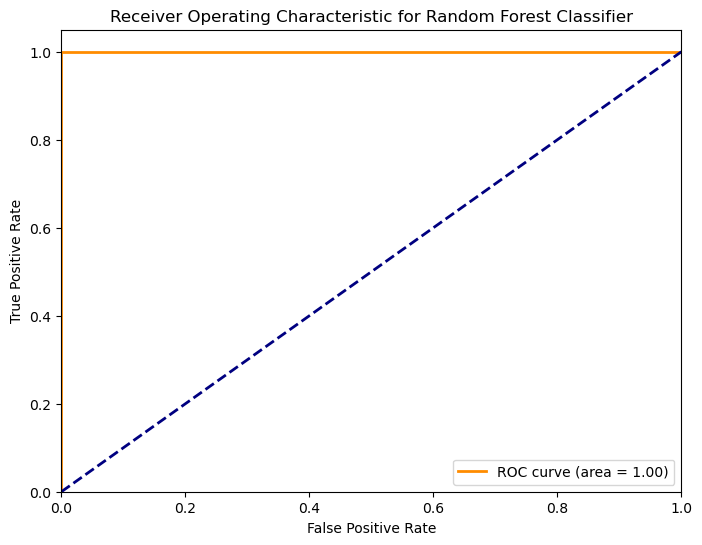

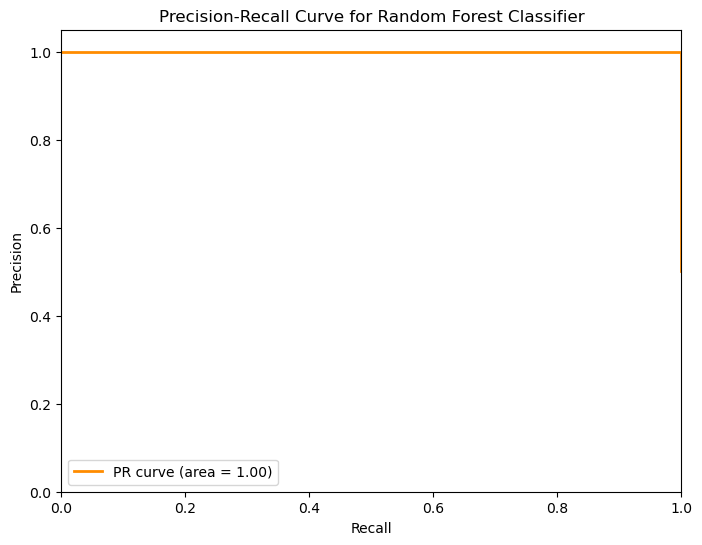

                      Model  Train Accuracy  Test Accuracy  F1 Score  \
0     Naive Baye Classifier        0.931776       0.930989  0.930664   
1  Decision Tree Classifier        1.000000       0.999947  0.999947   
2        LogisticRegression        0.968954       0.968498  0.968481   
3        XGBoost Classifier        0.999993       0.999974  0.999974   
4  Random Forest Classifier        0.996272       0.996362  0.996361   

   Precision    Recall  
0   0.938814  0.930989  
1   0.999947  0.999947  
2   0.969336  0.968498  
3   0.999974  0.999974  
4   0.996388  0.996362  


In [71]:
# Load your dataset, assuming you have a DataFrame 'data' and the target column is 'target'
# X = data.drop(columns=['target'])
# y = data['target']

# Split the data
# X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

# Create a list of classification models
# models = [
#     ('Naive Baye Classifier', BernoulliNB()),
#     ('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy', random_state=0)),
#     #('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
#     ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=0)),
#     ('XGBoost Classifier', XGBClassifier(eval_metric='mlogloss')),
#     ('Random Forest Classifier', RandomForestClassifier(n_jobs=-1, random_state=0)),
# ]

# # DataFrame to store results
# results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall'])

# # Iterate through models
# for model_name, model in models:
#     train_model(model, X_train, y_train)
#     train_evaluation = evaluate_model(model, X_train, y_train,f'Training - {model_name}')
#     test_evaluation = evaluate_model(model, X_test, y_test,f'Test - {model_name}')

#     # Store results in the DataFrame
#     results_df = results_df.append({
#         'Model': model_name,
#         'Train Accuracy': train_evaluation['accuracy'],
#         'Test Accuracy': test_evaluation['accuracy'],
#         'F1 Score': test_evaluation['f1_score'],
#         'Precision': test_evaluation['precision'],
#         'Recall': test_evaluation['recall'],
#     }, ignore_index=True)
    
    
#     # Calculate ROC and Precision-Recall curves
#     y_prob = model.predict_proba(X_test)[:, 1]
#     fpr, tpr, _ = roc_curve(y_test, y_prob)
#     roc_auc = auc(fpr, tpr)
    
#     precision, recall, _ = precision_recall_curve(y_test, y_prob)
#     pr_auc = auc(recall, precision)
    
#     # Plot ROC curve and Precision-Recall curve
#     plot_roc_curve(fpr, tpr, roc_auc, model_name)
#     plot_precision_recall_curve(precision, recall, pr_auc, model_name)

# # Print results
# print(results_df)

import pandas as pd

# DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall'])

import numpy as np

# Ensure y_train and y_test are NumPy arrays and then ravel them
y_train_np = np.ravel(y_train.to_numpy())  # Convert to NumPy array and flatten
y_test_np = np.ravel(y_test.to_numpy())    # Convert to NumPy array and flatten

# Iterate through models
for model_name, model in models:
    train_model(model, X_train, y_train_np)  # Flatten y_train
    train_evaluation = evaluate_model(model, X_train, y_train_np, f'Training - {model_name}')
    test_evaluation = evaluate_model(model, X_test, y_test_np, f'Test - {model_name}')

    # Create a temporary DataFrame with the current model's results
    temp_df = pd.DataFrame({
        'Model': [model_name],
        'Train Accuracy': [train_evaluation['accuracy']],
        'Test Accuracy': [test_evaluation['accuracy']],
        'F1 Score': [test_evaluation['f1_score']],
        'Precision': [test_evaluation['precision']],
        'Recall': [test_evaluation['recall']],
    })

    # Concatenate the temporary DataFrame to the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

    # Calculate ROC and Precision-Recall curves
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    # Plot ROC curve and Precision-Recall curve
    plot_roc_curve(fpr, tpr, roc_auc, model_name)
    plot_precision_recall_curve(precision, recall, pr_auc, model_name)

# Print results
print(results_df)


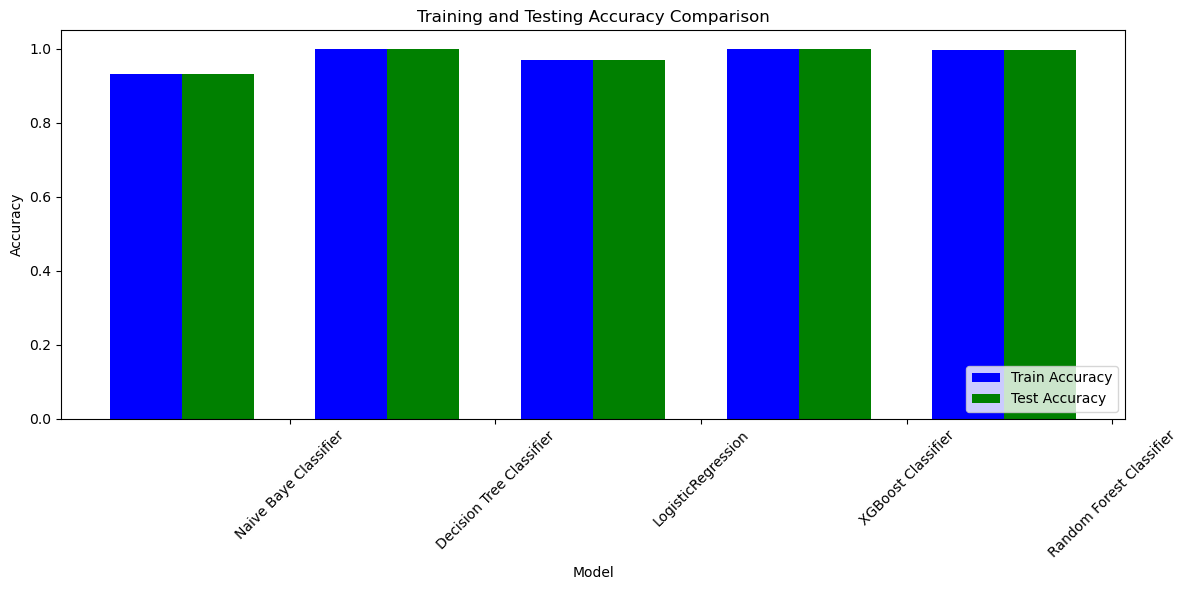

In [72]:
# ... (previous code remains the same)

# Create a grouped bar plot for comparing training and testing accuracy for each model
accuracy_metrics = ['Train Accuracy', 'Test Accuracy']
model_names = results_df['Model']
num_models = len(models)

# Set the width of each bar
bar_width = 0.35  # Adjusted the bar width to center the bars

# Generate an array of indices for the x-axis
indices = np.arange(len(model_names))

# Create a color map for different accuracy metrics
colors = ['b', 'g']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(accuracy_metrics):
    # Calculate the x-axis positions for each metric
    x_positions = [ind + i * bar_width for ind in indices]

    # Extract metric values for each model
    metric_values = results_df[metric]

    # Plot the grouped bars for each metric
    plt.bar(x_positions, metric_values, width=bar_width, label=metric, color=colors[i])

# Set x-axis labels, ticks, and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.xticks(indices + (bar_width * (num_models - 1)) / 2, model_names, rotation=45)
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


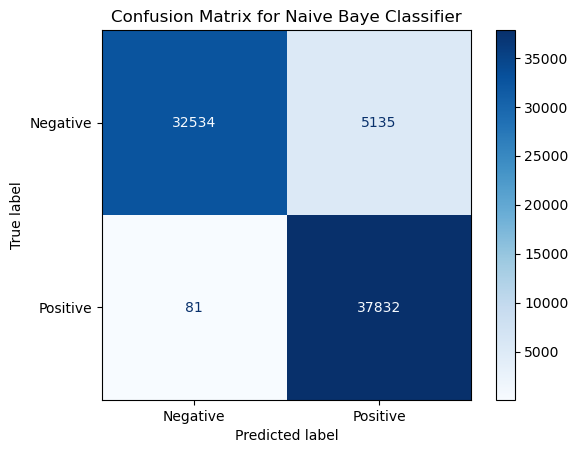

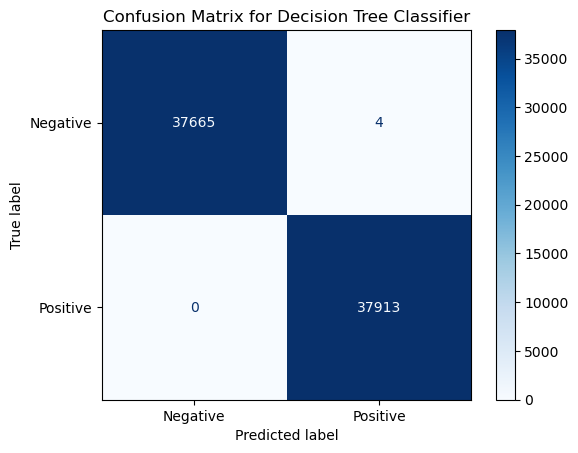

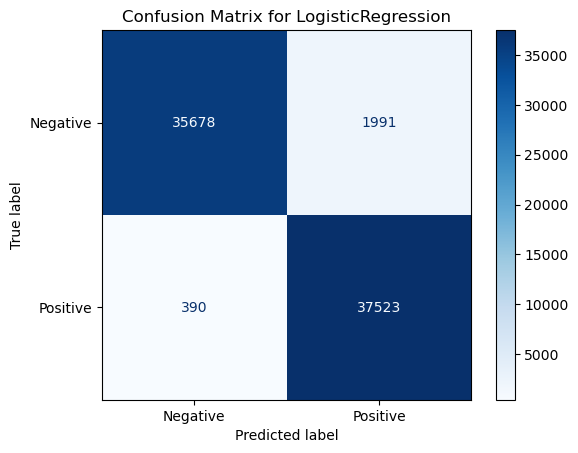

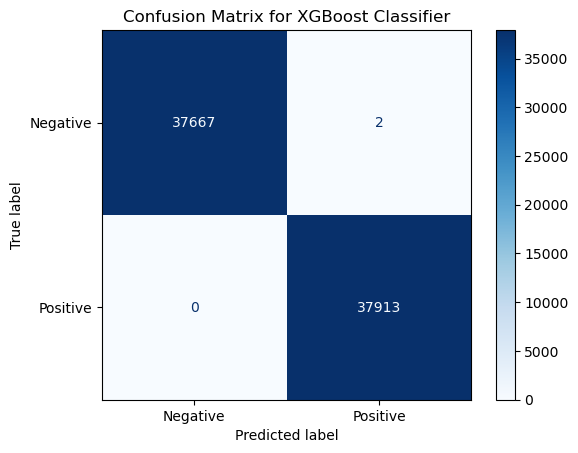

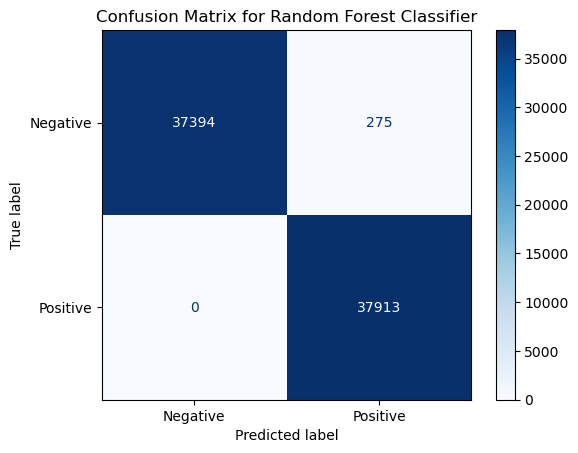

In [73]:
# Plot confusion matrix for each model
for model_name, model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

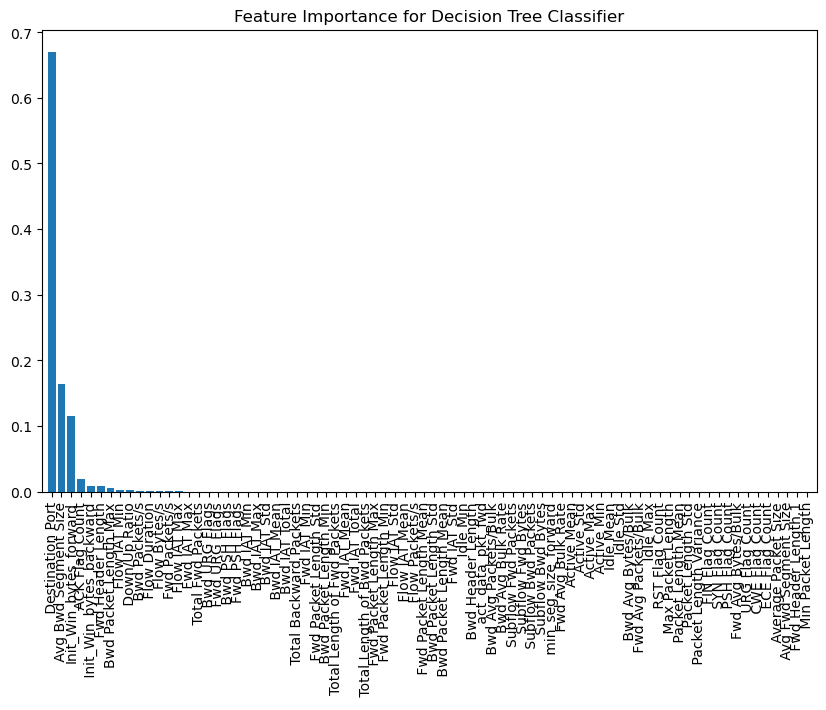

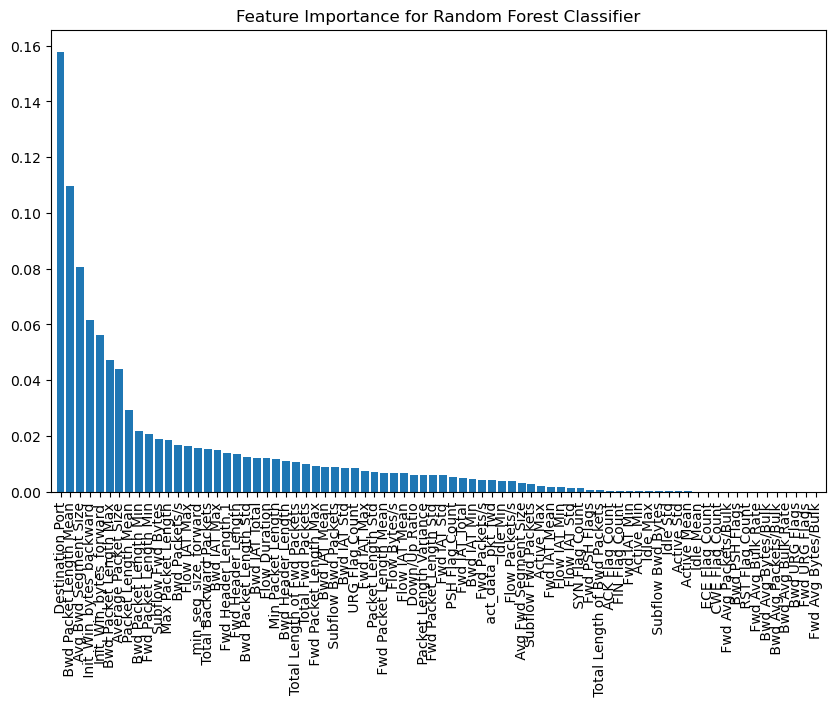

In [74]:
# Visualize feature importance for tree-based models
for model_name, model in models:
    if 'Decision Tree' in model_name or 'Random Forest' in model_name:
        importances = model.feature_importances_
        feature_names = X.columns
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance for {model_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show()


C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

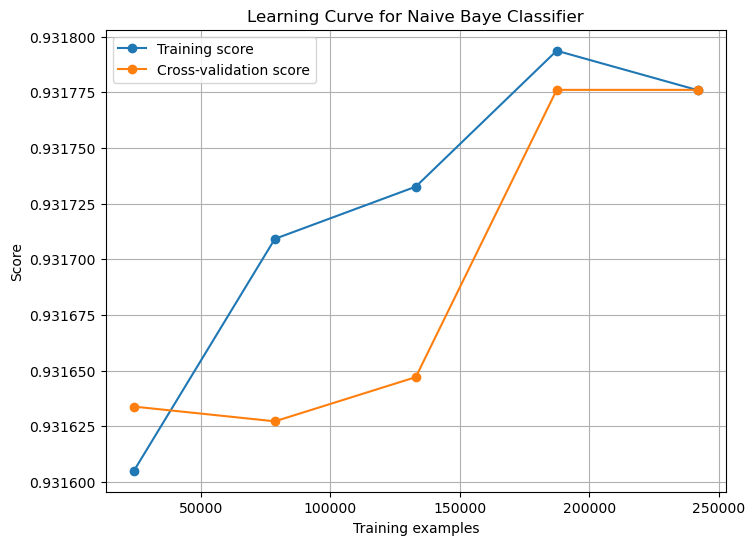

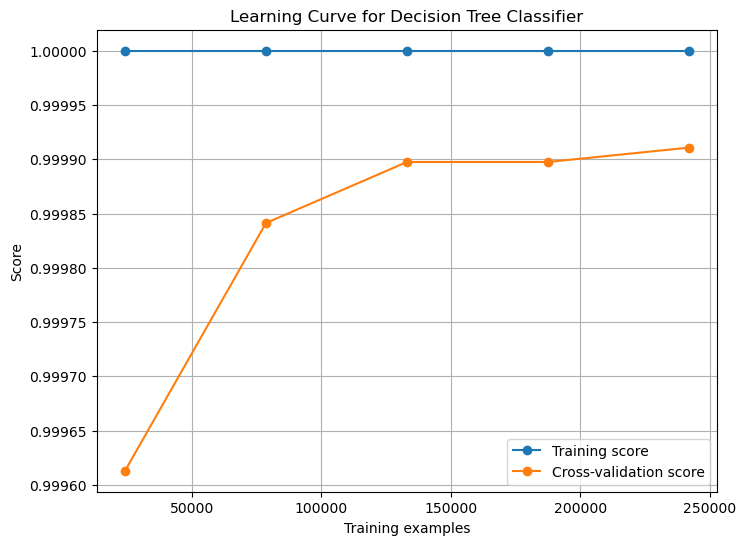

C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

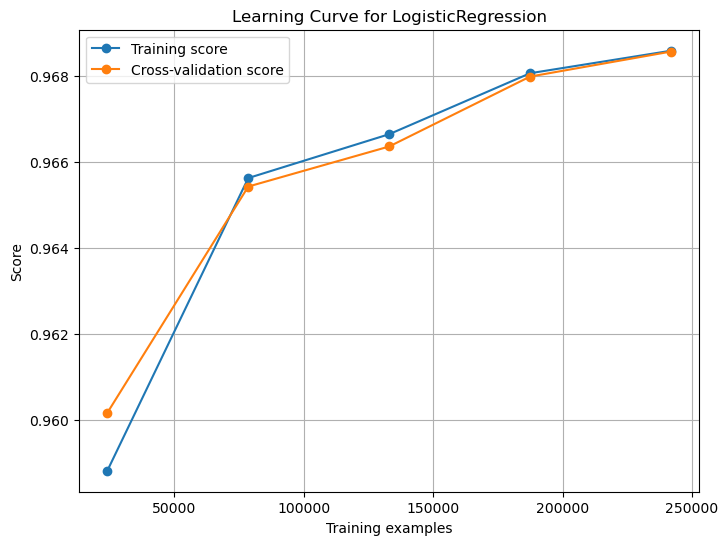

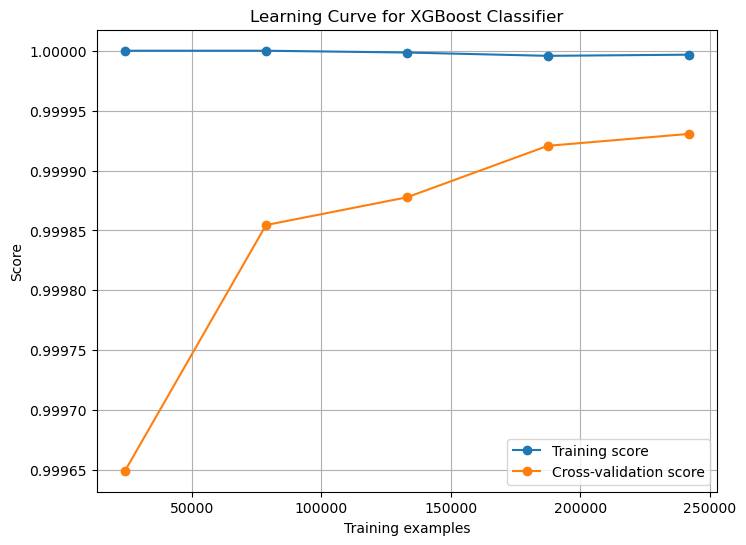

C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pandi\anaconda3\python\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionW

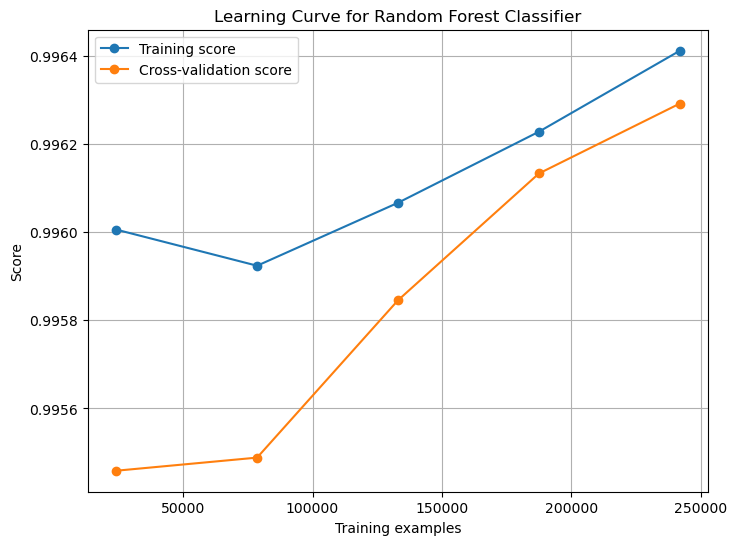

In [75]:
# Visualize learning curves for each model
from sklearn.model_selection import learning_curve

for model_name, model in models:
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

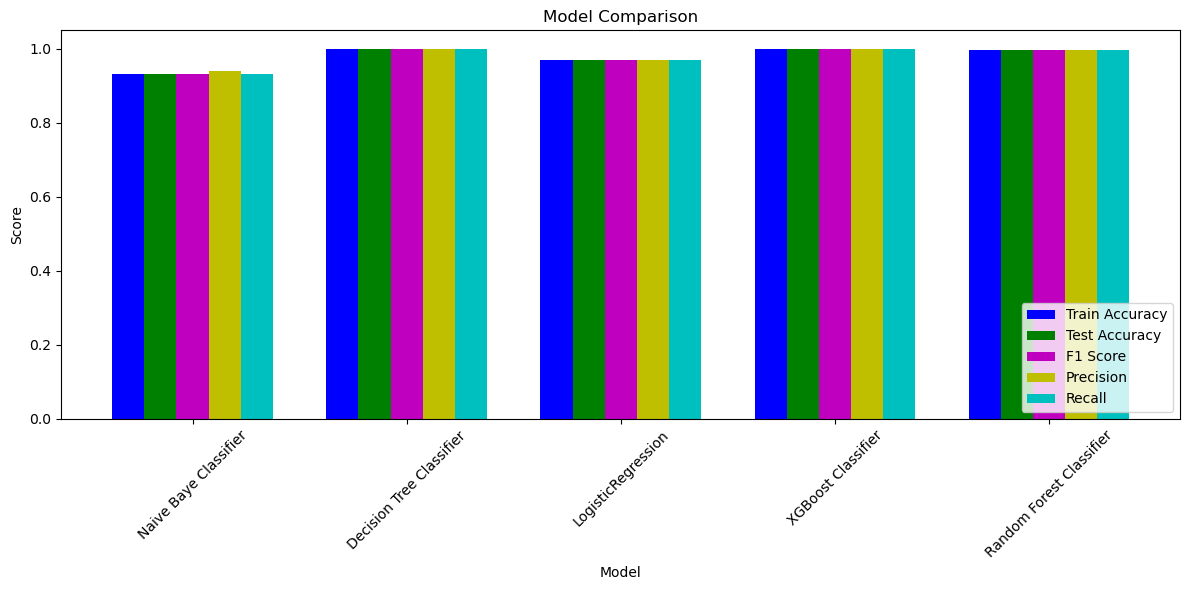

In [76]:
# Create a grouped bar plot for comparing multiple metrics across models
metrics_to_compare = ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall']
model_names = results_df['Model']
num_models = len(models)

# Set the width of each bar
bar_width = 0.15

# Generate an array of indices for the x-axis
indices = np.arange(len(model_names))

# Create a color map for different metrics
colors = ['b', 'g', 'm', 'y','c']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics_to_compare):
    # Calculate the x-axis positions for each metric
    x_positions = [ind + i * bar_width for ind in indices]

    # Extract metric values for each model
    metric_values = results_df[metric]

    # Plot the grouped bars for each metric
    plt.bar(x_positions, metric_values, width=bar_width, label=metric, color=colors[i])

# Set x-axis labels, ticks, and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(indices + (bar_width * (num_models - 1)) / 2, model_names, rotation=45)
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

In [77]:
results_df

,Model,Train Accuracy,Test Accuracy,F1 Score,Precision,Recall
0,Naive Baye Classifier,0.931776,0.930989,0.930664,0.938814,0.930989
1,Decision Tree Classifier,1.000000,0.999947,0.999947,0.999947,0.999947
2,LogisticRegression,0.968954,0.968498,0.968481,0.969336,0.968498
3,XGBoost Classifier,0.999993,0.999974,0.999974,0.999974,0.999974
4,Random Forest Classifier,0.996272,0.996362,0.996361,0.996388,0.996362
